In [13]:
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

def map_go_annotations_to_proteins(json_file):
    """
    Maps GO annotations to proteins from a JSON file.

    Parameters:
        json_file (str): Path to the JSON file containing protein data.

    Returns:
        dict: A dictionary mapping GO terms to lists of protein IDs.
    """
    # Load the JSON data
    with open(json_file, 'r') as f:
        data = json.load(f)

    # Dictionary to map GO terms to protein IDs
    go_to_proteins = defaultdict(list)

    # Iterate through the proteins in the data
    for protein in data:
        protein_id = protein.get("protein_id")
        protein_name = protein.get("protein_name")
        go_annotations = protein.get("go_annotations", [])
        
        # Map each GO term to the current protein ID
        for go_term in go_annotations:
            go_to_proteins[go_term].append(tuple({protein_id, protein_name}))

    return go_to_proteins

In [14]:
json_file = "./../raw_data/parsed_proteins.json"  # Replace with the path to your JSON file
go_to_proteins = map_go_annotations_to_proteins(json_file)

go_to_proteins

defaultdict(list,
            {'F:aromatase activity': [('Putative cytochrome P450 2D7',
               'A0A087X1C5'),
              ('Cytochrome P450 1A1', 'P04798'),
              ('P05177', 'Cytochrome P450 1A2'),
              ('P05181', 'Cytochrome P450 2E1'),
              ('P08684', 'Cytochrome P450 3A4'),
              ('Cytochrome P450 2C8', 'P10632'),
              ('Aromatase', 'P11511'),
              ('P11712', 'Cytochrome P450 2C9'),
              ('P13584', 'Cytochrome P450 4B1'),
              ('P20815', 'Cytochrome P450 3A5'),
              ('P20853', 'Cytochrome P450 2A7'),
              ('P24462', 'Cytochrome P450 3A7'),
              ('P24903', 'Cytochrome P450 2F1'),
              ('P33260', 'Cytochrome P450 2C18'),
              ('P33261', 'Cytochrome P450 2C19'),
              ('P78329', 'Cytochrome P450 4F2'),
              ('P98187', 'Cytochrome P450 4F8'),
              ('Cytochrome P450 4A11', 'Q02928'),
              ('Q08477', 'Cytochrome P450 4F3'),
      

In [6]:
def analyze_go_distribution(go_to_proteins, top_n=20):
    """
    Analyzes and visualizes the distribution of GO terms.

    Parameters:
        go_to_proteins (dict): A dictionary mapping GO terms to protein IDs.
        top_n (int): Number of top GO terms to display in the plot. Default is 20.
    """
    # Count the occurrences of each GO term
    go_counts = {go: len(proteins) for go, proteins in go_to_proteins.items()}

    # Sort and select the top N GO terms
    top_go_counts = dict(Counter(go_counts).most_common(top_n))

    # Plot the distribution
    plt.figure(figsize=(12, 8))
    plt.barh(list(top_go_counts.keys()), list(top_go_counts.values()), color='skyblue')
    plt.xlabel('Frequency (Number of Proteins)')
    plt.ylabel('GO Terms')
    plt.title(f'Top {top_n} GO Terms Distribution')
    plt.gca().invert_yaxis()  # Invert y-axis to show the most frequent GO term at the top
    plt.tight_layout()
    plt.show()

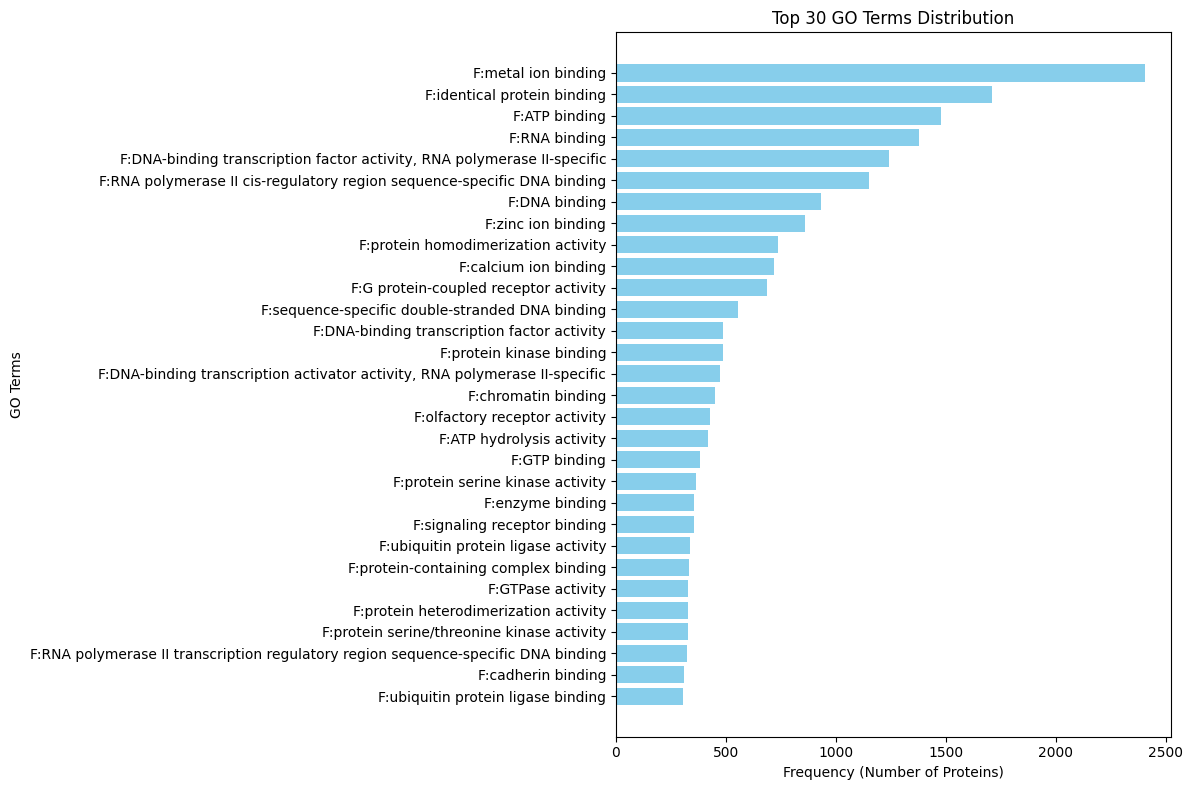

In [8]:
analyze_go_distribution(go_to_proteins, top_n=30)

In [15]:
def get_protein_names(go_to_proteins, go_term):
    return go_to_proteins[go_term]

In [17]:
proteins_for_metal_ion = get_protein_names(go_to_proteins, "F:metal ion binding")
proteins_for_metal_ion

[('Ciliated left-right organizer metallopeptidase', 'A0A1B0GTW7'),
 ('E3 ubiquitin-protein ligase TM129', 'A0AVI4'),
 ('Fez family zinc finger protein 1', 'A0PJY2'),
 ('A1A519', 'Protein FAM170A'),
 ('Probable oxidoreductase PXDNL', 'A1KZ92'),
 ('Probable ribonuclease ZC3H12D', 'A2A288'),
 ('Metallo-beta-lactamase domain-containing protein 1', 'A4D2B0'),
 ('A5YM72', 'Carnosine synthase 1'),
 ('Metalloprotease TIKI2', 'A6NFA1'),
 ('A6NHL2', 'Tubulin alpha chain-like 3'),
 ('Wilms tumor protein 1-interacting protein', 'A6NIX2'),
 ('A6NNM8', 'Tubulin polyglutamylase TTLL13'),
 ('A6NNZ2', 'Tubulin beta 8B'),
 ('A6PVC2', 'Protein monoglycylase TTLL8'),
 ('TANK-binding kinase 1-binding protein 1', 'A7MCY6'),
 ('Sine oculis-binding protein homolog', 'A7XYQ1'),
 ('Calcium-activated chloride channel regulator 1', 'A8K7I4'),
 ('A8K8V0', 'Zinc finger protein 785'),
 ('E3 ubiquitin-protein ligase NEURL1B', 'A8MQ27'),
 ('A8MTJ3', 'Guanine nucleotide-binding protein G(t) subunit alpha-3'),
 ('PHD fi

## How many proteins dont have any GO term?

In [28]:
def proteins_with_no_go_types(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)

    no_go_term_proteins = []

    # Iterate through the proteins in the data
    for protein in data:
        go_annotations = protein.get("go_annotations", [])
        if not go_annotations:
            protein_id = protein.get("protein_id")
            protein_name = protein.get("protein_name")
            
            no_go_term_proteins.append(tuple({protein_id, protein_name}))

    return no_go_term_proteins

def all_proteins(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        
    proteins = []
    
    for protein in data:
        protein_id = protein.get("protein_id")
        protein_name = protein.get("protein_name")
        proteins.append(tuple({protein_id, protein_name}))
        
    return proteins

In [31]:
no_go_proteins = proteins_with_no_go_types(json_file)
# print(no_go_proteins)
print(f"Number of proteins without go terms: {len(no_go_proteins)}")

all_prots = all_proteins(json_file)
print(f"Number of all proteins: {len(all_prots)}")
print(f"Percentage: {len(no_go_proteins) / len(all_prots)*100:.2f}%")

Number of proteins without go terms: 4339
Number of all proteins: 20421
Percentage: 21.25%
